# Importing Jupyter Notebooks with Margo Loader

author: Jake Kara <jake@jakekara.com>

## Overview

In this notebook we will learn how to import notebooks with Margo Loader.

Normally when we use Python's `import` statement, we can only load Python modules, which are `.py` files. However, Margo Loader makes it possible to also load Jupyter Notebooks, which are `.ipynb` files using the same `import` statement.

Margo Loader recognizes special comments that tell it how to import a notebook. Those comments are called margin notes. Sine they're written in the Margo syntax, we call them Margo notes. You'll recognize them because they start with `# ::` when they're in code cells.

This notebook won't focus on how to write Margo notes because most of those appear in notebooks that are intended to be imported. You will learn more about these notes when you look at the notebook module we import, `Met API.ipynb`. 

There are a few Margo notes in this document, but we've tucked them at the bottom, since they're not the main focus.

## Install dependencies 

This notebook is designed to run on MyBinder.org. That means all of the required packages are already installed and you skip to section 3. 

But if you're running it locally, you'll have to install these dependencies yourself. To do so, uncomment the cell below and run it, or run a similar command at the command line.


In [1]:
# Uncomment to install requirements
# !pip install -q -r requirements.txt

## Importing a notebook

You've probably used a statement like `import os` to import a library (in this case, the "Operating System" library) from Python's standard library. You might also have used it to import "local" files — files in the same folder as the code doing the importing. But with Margo Loader, you can use `import` to import Jupyter Notebooks as if they were `.py` files.

Let's start off by importing `margo_loader`.

In [2]:
import margo_loader

Next, we'll import our first notebook. In this case we're going to load the "Met API.iypnb" notebook in this repo. Since the name has spaces and module names cannot have spaces, we have to put underscores when we write its name in the `import` statement:

In [3]:
import Met_API

One way we can find out more about a module is Python's `help` function. Let's call it and see what we can learn about `Met_API`.

In [4]:
help(Met_API)

Help on module Met_API:

NAME
    Met_API - # Met API helpers

DESCRIPTION
    This notebook defines some API helpers for working with the [Metropolitan Museum of Art's API](https://metmuseum.github.io/).
    
    author: Jake Kara <jake@jakekara.com>

FUNCTIONS
    do_search(term)
        Perform a basic text search and return a list of object IDs.
        
        goes wrong, then it will crash.
    
    download_image(metadata)
        Download an image and return an object that contains its file name and bytes
        
        goes wrong, then it will crash.
    
    get_object_metadata(object_id)
        Get metadata for an object.
        
        goes wrong, then it will crash.
    
    is_public_domain(meta_object)
        Determine if object is in the public domain
        
        goes wrong, then it will crash.

DATA
    ENDPOINT = 'https://collectionapi.metmuseum.org/public/collection/v1'

FILE
    /Users/jake/Code/thesis/margo-loader-book/Met API.ipynb




We can see from the help text that the notebook provides wrapper functions for the Metropolitan Museum of Art's API. The two functions are:
* do_search
* get_object_metadata

## 4. Using functions from the imported notebook

We can use the functions exposed by `Met_API` in this notebook. This is the whole point of using modular notebooks. We can write code to do one task in one notebook, and then reuse it somewhere else. This helps organize our methodology into discrete components, making them easier to maintain. Plus, we can reuse the same code in different places.

Let's start by doing a search. I might need a refresher on how to use the `do_search` function. So I'll use the `help` function.

In [5]:
help(Met_API.do_search)

Help on function do_search in module Met_API:

do_search(term)
    Perform a basic text search and return a list of object IDs.
    
    goes wrong, then it will crash.



OK. Got it. I can provide `do_search` a string to search for, and I'll receive a list of object IDs.

In [6]:
results = Met_API.do_search("Vincent Van Gogh")
print(f"Found {len(results)} results!")
print(f"results is a {type(results).__name__}")

Found 265 results!
results is a list


Wow, that's a lot of results! OK. Let's get some metadata for one of these items. 

In [7]:
metadata = Met_API.get_object_metadata(results[1])
metadata

{'objectID': 436533,
 'isHighlight': False,
 'accessionNumber': '1992.374',
 'accessionYear': '1992',
 'isPublicDomain': True,
 'primaryImage': 'https://images.metmuseum.org/CRDImages/ep/original/DT1947.jpg',
 'primaryImageSmall': 'https://images.metmuseum.org/CRDImages/ep/web-large/DT1947.jpg',
 'additionalImages': [],
 'constituents': [{'constituentID': 161947,
   'role': 'Artist',
   'name': 'Vincent van Gogh',
   'constituentULAN_URL': 'http://vocab.getty.edu/page/ulan/500115588',
   'constituentWikidata_URL': 'https://www.wikidata.org/wiki/Q5582',
   'gender': ''}],
 'department': 'European Paintings',
 'objectName': 'Painting',
 'title': 'Shoes',
 'culture': '',
 'period': '',
 'dynasty': '',
 'reign': '',
 'portfolio': '',
 'artistRole': 'Artist',
 'artistPrefix': '',
 'artistDisplayName': 'Vincent van Gogh',
 'artistDisplayBio': 'Dutch, Zundert 1853–1890 Auvers-sur-Oise',
 'artistSuffix': '',
 'artistAlphaSort': 'Gogh, Vincent van',
 'artistNationality': 'Dutch',
 'artistBeginD

OK, let's download an image using `Met_API.download_image` and `IPython.display.Image` to display it.

DT1947.jpg


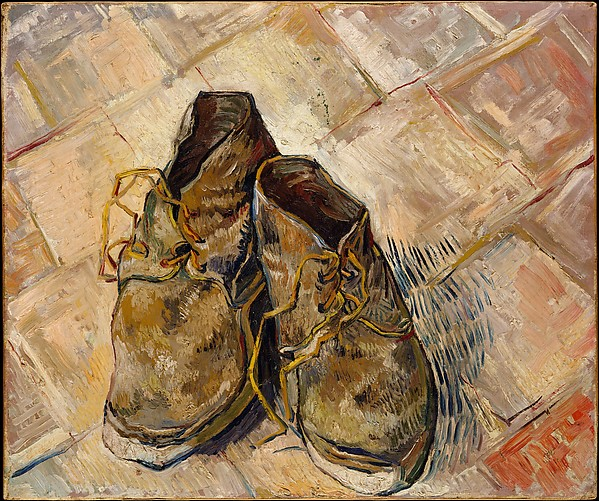

In [8]:
from IPython import display

image = Met_API.download_image(metadata)
print(image["file_name"])
display.Image(image["file_bytes"])

## Prevent imports

Because this notebook does not define any code we want to re-use, we can mark it with `not-a-module` to prevent it from ever being imported by Margo. Normally this should go near the top of the notebook, but we didn't want to start off with that.

In [9]:
# :: not-a-module ::

## Define requirements

We can assign a raw text list of python requirements here. In the notebook [Generate requirements.txt](./Generate%20requirements.txt.ipynb), we will see how to extract these values.

In [10]:
# :: requirements.txt[raw]:
# :: 'margo-loader' ::

## Next lesson

Now let's take a look at what's inside the notebook we've imported, [Met API.ipynb](./Met%20API.ipynb).